In [58]:
%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import pandas as pd

rez=600

#plt.style.use('ggplot')
#the mean of the ztp distribution
def ztp_avg(lam):
    return lam/(1-np.exp(-lam))

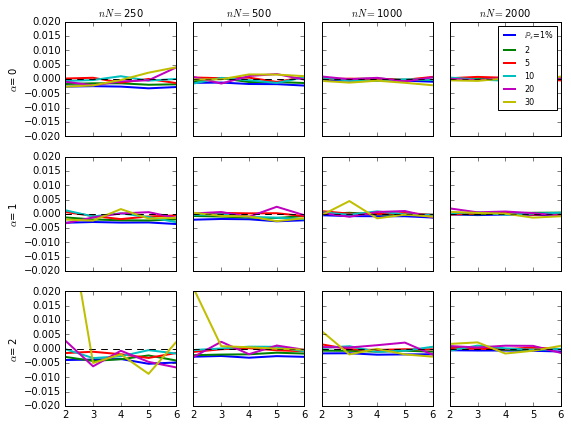

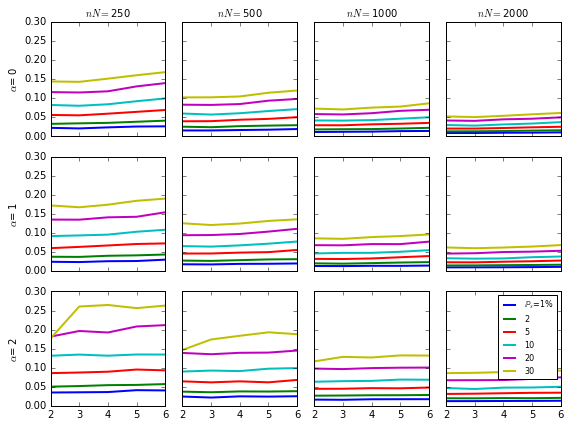

In [59]:
#make line plots n vs error for several different n*N stays constant, for given error metric, and for all alphas
#separate by error metric

am_sim = pd.read_csv('data/estlambda_fixedsize_more.csv')

n_list = am_sim.nsamp.unique()
N_list = am_sim.npers.unique()
alpha_list = am_sim.alpha.unique()
lambda_list = am_sim.lamsim.unique()
nN=am_sim.totsamp.unique()

f1, axarr1 = plt.subplots(len(alpha_list),len(nN),sharey=True,sharex=True,figsize=(8,6),dpi=600)
f2, axarr2 = plt.subplots(len(alpha_list),len(nN),sharey=True,sharex=True,figsize=(8,6),dpi=600)

l=[]
for inN in range(len(nN)):

    am_sim_nN = am_sim[am_sim.totsamp == nN[inN]]

    for ia in range(len(alpha_list)):

        for il in range(len(lambda_list)):
            
            lam=lambda_list[il]
            al=alpha_list[ia]
            
            df = am_sim_nN.query('(lamsim==' + str(lam) +') & (alpha==' + str(al) + ')' )

            l.append(axarr1[ia][inN].plot(n_list,ztp_avg(df['lamsim'])-ztp_avg(df['meanlamest']),lw=2)[0])
            axarr1[ia][inN].axhline(0,ls='--',color='k',lw=0.5)
            #axarr1[ia][inN].semilogy(n_list,np.abs(df['lamsim']-df['meanlamest']),lw=2)
            axarr2[ia][inN].plot(n_list,df['stddevlamest'],lw=2) #standard deviation in estimated lambda
            #axarr2[ia][inN].plot(n_list,df['pbiaslamest'],lw=2)

        #axarr[0][ia].set_title(r'$\alpha=$'+ str(al),fontsize=12)
        #axarr[1][ia].set_ylim([-5,35])
        #axarr[0][ia].set_ylim([0,0.3])
    
        axarr1[ia][0].set_ylabel(r'$\alpha$= ' + str(al))
        axarr2[ia][0].set_ylabel(r'$\alpha$= ' + str(al))

    axarr1[0][inN].set_title(r'$nN = $' + str(nN[inN]),fontsize=10)
    axarr2[0][inN].set_title(r'$nN = $' + str(nN[inN]),fontsize=10)

#axarr1[0][0].set_yticks(np.linspace(0,0.3,7))
axarr1[0][0].set_ylim([-0.02,0.02])
#axarr2[0][0].set_yticks(np.linspace(-10,50,7))

axarr1[0][3].legend(l,[r'$\mathbb{P}_s$=1%','2','5','10','20','30'],loc=1,fontsize=8)
axarr2[2][3].legend(l,[r'$\mathbb{P}_s$=1%','2','5','10','20','30'],loc=1,fontsize=8)

axarr1[0][0].set_xticks(range(min(n_list),max(n_list)+1))
axarr2[0][0].set_xticks(range(min(n_list),max(n_list)+1))

f1.tight_layout()
f1.savefig('figures/nN_accuracy.pdf')  # No warning now
f2.tight_layout()
f2.savefig('figures/nN_precision.pdf')  # No warning now


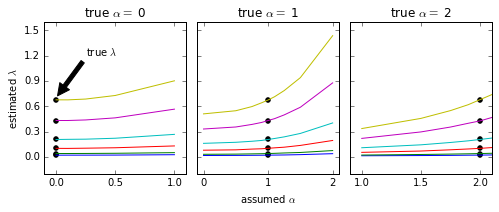

In [69]:
#show how the guess of alpha effects the estimate
am_sim = pd.read_csv('data/estlambda_misspec_alpha.csv')

n=3; N=500

alpha_used_list = list(am_sim.alphause.unique())
alpha_list = list(am_sim.alpha.unique())
lambda_list = list(am_sim.lamsim.unique())

f, axarr = plt.subplots(1,len(alpha_list),sharey=True,sharex=False,figsize=(7,3),dpi=600)
iax=0
for al in alpha_list:
    temp1_df = am_sim[am_sim['alpha']==al]
    ax=axarr[iax]
    for lam in lambda_list:
        temp2_df=temp1_df[temp1_df['lamsim']==lam]
        
        #ax.plot(temp2_df['alphause'],temp2_df['lamsim'].iloc[0]+np.exp((temp2_df['alphause']-iax)/8),color='k')

        ax.plot(temp2_df['alphause'],temp2_df['meanlamest'])
        ax.scatter(iax,temp2_df['lamsim'].iloc[0],color='k')
        ax.set_title(r'true $\alpha=$ ' + str(alpha_list[iax]),fontsize=12)
    iax+=1
#axarr[0].legend(['$p_\mathcal{S}$=0.01','0.02','0.05','0.10','0.20','0.30'],loc=0,fontsize=8)
#axarr[0].legend(lambda_list,fontsize=8)
axarr[0].set_ylabel(r'estimated $\lambda$')
axarr[1].set_xlabel(r'assumed $\alpha$')

axarr[0].set_xlim([-0.1,1.1])
axarr[0].set_xticks(np.linspace(0,1,3))
axarr[0].annotate('true $\lambda$', xy=(0, 0.7), xytext=(0.25, 1.2),
                  arrowprops=dict(facecolor='black', shrink=0.05))

axarr[1].set_xlim([-0.1,2.1])
axarr[1].set_xticks(np.linspace(0,2,3))

axarr[2].set_xlim([0.9,2.1])
ax.set_yticks(np.linspace(0,1.5,6))
axarr[2].set_xticks(np.linspace(1,2,3))
plt.tight_layout()

plt.savefig('figures/wrong_alpha.pdf')  # No warning now


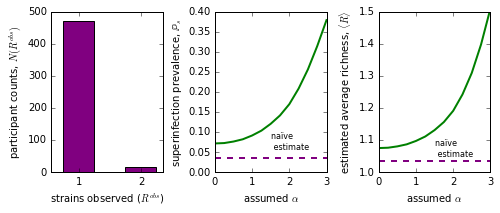

In [61]:
#Johnston et al example assumes n=2??

data=np.array([471,18])

est_Ps=[0.07217533, 0.07312570, 0.07692053, 0.08259283, 0.09199348, 0.10411502, 0.12117160, 0.14206099, 0.17010344, 0.20903236, 0.25685171, 0.31487363, 0.37984697]

est_r =[1.075825, 1.076874, 1.081079, 1.087407, 1.098007, 1.111885, 1.131828, 1.156939, 1.191897, 1.242968, 1.310148, 1.399126, 1.510153]

alpha=np.arange(0,3.1,0.25)
robs = np.arange(1,len(data)+1)

naive_r=sum(data*robs)/sum(data)
naive_Ps=sum(data[1:])/sum(data)

plt.figure(figsize=(7,3),dpi=600)

plt.subplot(131)
plt.bar(robs,data,color='purple',width=0.5)
plt.xticks(robs+0.25,robs)
#plt.xlim([0.5,3])
plt.ylabel(r'participant counts, $N(R^{obs})$',fontsize=10)
plt.xlabel(r'strains observed ($R^{obs}$)',fontsize=10)

plt.subplot(132)
plt.plot(alpha,est_Ps,color='green',lw=2)
plt.axhline(naive_Ps,color='purple',ls='--',lw=2)
plt.xticks(range(4))
plt.ylabel(r'superinfection prevalence, $\mathbb{P}_s$',fontsize=10)
plt.xlabel(r'assumed $\alpha$',fontsize=10)
plt.annotate('naïve \n estimate', xy=(1.5, naive_Ps+0.02), xytext=(1.5, naive_Ps+0.02),fontsize=8)
plt.yticks(np.linspace(0,0.4,9))

plt.subplot(133)
plt.plot(alpha,est_r,color='green',lw=2)
plt.axhline(naive_r,color='purple',ls='--',lw=2)
plt.xticks(range(4))
plt.ylabel(r'estimated average richness, $\langle R \rangle$',fontsize=10)
plt.xlabel(r'assumed $\alpha$',fontsize=10)
plt.ylim([1,1.5])
plt.annotate('naïve \n estimate', xy=(1.5, 1.05), xytext=(1.5, 1.05),fontsize=8)

plt.tight_layout()

plt.savefig('figures/eg_johnstonHSV.pdf')

In [62]:
#simulate UNeven data
def simulate_data(lambda_sim,alpha,N_sim,n_sim):
    
    trial = np.random.poisson(lambda_sim,[N_sim*100]) #workaround to avoid drawing from ZTP
    trial = trial[trial>0] #only take participants with Robs>0
    true_trial = trial[0:N_sim] #just use the sims that matter
    
    Robs=np.zeros(10) #Robs up to max value, 10 strains for example
    
    #loop through patients
    for i in range(len(true_trial)):
        R=true_trial[i]
        
        r = np.arange(1,R+1)
        #alpha=0
        p_j = np.exp(-alpha*r)/sum(np.exp(-alpha*r))
        
        samples = np.random.multinomial(n_sim,p_j)
        Robs[sum(samples>0)-1]+=1 #add a count to the histogram
    
    return Robs

In [63]:
#compare naive and EM method for single strain per sample data

amalia_sims = pd.read_csv('data/estlambda_fixedsize_more.csv')

r=np.arange(1,11)
naive=[]
for i in range(len(amalia_sims.lamsim)):
    counts=simulate_data(amalia_sims.lamsim[i],amalia_sims.alpha[i],amalia_sims.npers[i],amalia_sims.nsamp[i])    
    naive.append(sum(counts*r)/sum(counts))

actual=ztp_avg(amalia_sims.lamsim)

#compute several other things we want as in the other file for even case

naive_pct_error=(np.array(naive)-np.array(actual))/np.array(actual)*100
EM_pct_error=(np.array(ztp_avg(amalia_sims.meanlamest))-np.array(actual))/np.array(actual)*100
#EM_pct_error=np.array(amalia_sims.pbiaslamest)

plt.figure(figsize=(5,5),dpi=rez)
plt.scatter(actual+np.random.normal(0,0.005,len(actual)),naive,color='coral',alpha=0.2,s=30,marker='o')
plt.scatter(actual+np.random.normal(0,0.005,len(actual)),ztp_avg(amalia_sims.meanlamest),color='teal',alpha=0.2,s=30,marker='s')
plt.ylim([0.95,1.4])
plt.xlim([0.95,1.4])
plt.xlabel('true average richness')
plt.ylabel('estimated average richness')
plt.legend(['naïve','EM'],fontsize=10,loc=2)
#plt.xticks(range(1,2))
#plt.yticks(range(1,2))
x=np.linspace(0,6,100)
plt.plot(x,x,color='k',ls='--')
plt.savefig('figures/uneven_avgR_vs_trueR2.pdf')

#error plots for HSV 1 strain per sample model
f, axarr = plt.subplots(2,2,sharey=True,sharex=False,figsize=(5,5),dpi=1000)

axarr[0][0].scatter(amalia_sims.nsamp+np.random.normal(0,0.1,len(actual)),naive_pct_error,color='coral',alpha=0.2,s=30,marker='o')
axarr[0][0].scatter(amalia_sims.nsamp+np.random.normal(0,0.1,len(actual)),EM_pct_error,color='teal',alpha=0.2,s=30,marker='s')
axarr[0][0].set_xlabel(r'number samples, $n$')
axarr[0][0].set_xticks(range(2,7))
axarr[0][0].set_ylim([-30,10])
axarr[0][0].set_ylabel('estimate accuracy \n (% error in avg richness)')
axarr[0][0].legend(['naïve','EM'],fontsize=10,loc=4)
axarr[0][0].axhline(0,color='k',ls='--')

axarr[0][1].scatter(amalia_sims.alpha+np.random.normal(0,0.05,len(actual)),naive_pct_error,color='coral',alpha=0.2,s=30,marker='o')
axarr[0][1].scatter(amalia_sims.alpha+np.random.normal(0,0.05,len(actual)),EM_pct_error,color='teal',alpha=0.2,s=30,marker='s')
axarr[0][1].set_xlabel(r'superinfection param, $\alpha$')
axarr[0][1].axhline(0,color='k',ls='--')
axarr[0][1].set_xticks(np.linspace(0,2,3))

axarr[1][0].scatter(actual+np.random.normal(0,0.01,len(actual)),naive_pct_error,color='coral',alpha=0.2,s=30,marker='o')
axarr[1][0].scatter(actual+np.random.normal(0,0.01,len(actual)),EM_pct_error,color='teal',alpha=0.2,s=30,marker='s')
axarr[1][0].set_xlabel(r'actual average richness, $\langle R \rangle$')
axarr[1][0].axhline(0,color='k',ls='--')
axarr[1][0].set_ylabel('estimate accuracy \n (% error in avg richness)')

axarr[1][1].scatter(np.log10(amalia_sims.npers)+np.random.normal(0,0.01,len(actual)),naive_pct_error,color='coral',alpha=0.2,s=30,marker='o')
axarr[1][1].scatter(np.log10(amalia_sims.npers)+np.random.normal(0,0.01,len(actual)),EM_pct_error,color='teal',alpha=0.2,s=30,marker='s')
axarr[1][1].set_xlabel(r'number participants, $\log_{10}N$')
axarr[1][1].axhline(0,color='k',ls='--')
axarr[1][1].set_xticks(np.linspace(1.4,3.2,7))

plt.tight_layout()

plt.savefig('figures/uneven_errors2.pdf')

#could put error bars on these...

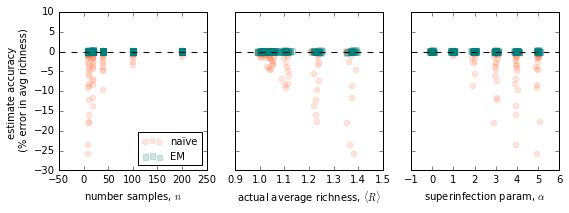

In [72]:
#error plots for HIV case, many strains per sample
amalia_sims = pd.read_csv('data/estHIV_500pers.csv')

actual=ztp_avg(amalia_sims.lamsim)

naive_pct_error=(ztp_avg(HIV_sims.meanrawlam)-actual)/actual*100
EM_pct_error=(ztp_avg(HIV_sims.meanlamest)-actual)/actual*100
f, axarr = plt.subplots(1,3,sharey=True,sharex=False,figsize=(8,3),dpi=1000)

axarr[0].scatter(amalia_sims.nsamp+np.random.normal(0,0.1,len(actual)),naive_pct_error,color='coral',alpha=0.2,s=30,marker='o')
axarr[0].scatter(amalia_sims.nsamp+np.random.normal(0,0.1,len(actual)),EM_pct_error,color='teal',alpha=0.2,s=30,marker='s')
#axarr[0].set_xlim([1.5,5.5])
axarr[0].set_xlabel(r'number samples, $n$')
#axarr[0].set_xticks(range(2,7))
axarr[0].set_ylim([-30,10])
axarr[0].set_ylabel('estimate accuracy \n (% error in avg richness)')
axarr[0].legend(['naïve','EM'],fontsize=10,loc=4)
axarr[0].axhline(0,color='k',ls='--')

axarr[1].scatter(actual+np.random.normal(0,0.01,len(actual)),naive_pct_error,color='coral',alpha=0.2,s=30,marker='o')
axarr[1].scatter(actual+np.random.normal(0,0.01,len(actual)),EM_pct_error,color='teal',alpha=0.2,s=30,marker='s')
#axarr[1].set_xlim([0.95,1.45])
axarr[1].set_xlabel(r'actual average richness, $\langle R \rangle$')
#axarr[1].set_xticks(np.linspace(1,1.4,5))
axarr[1].axhline(0,color='k',ls='--')

axarr[2].scatter(amalia_sims.alpha+np.random.normal(0,0.05,len(actual)),naive_pct_error,color='coral',alpha=0.2,s=30,marker='o')
axarr[2].scatter(amalia_sims.alpha+np.random.normal(0,0.05,len(actual)),EM_pct_error,color='teal',alpha=0.2,s=30,marker='s')
#axarr[2].set_xlim([-0.5,2.5])
axarr[2].set_xlabel(r'superinfection param, $\alpha$')
axarr[2].axhline(0,color='k',ls='--')
#axarr[2].set_xticks(range(3))

plt.tight_layout()

plt.savefig('figures/uneven_errors_HIV.pdf')

